In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 8
fig_height = 5
fig_format = 'png'
fig_dpi = 200
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/development/projects/active/HIRT/docs/field-guide':
  os.chdir(r'/development/projects/active/HIRT/docs/field-guide')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/usr/lib/python3.12/importlib/_bootstrap.py": 1767871850.0, "/usr/lib/python3.12/importlib/_bootstrap_external.py": 1767871850.0, "/usr/lib/python3.12/zipimport.py": 1767871850.0, "/usr/lib/python3.12/codecs.py": 1767871850.0, "/usr/lib/python3.12/encodings/aliases.py": 1767871850.0, "/usr/lib/python3.12/encodings/__init__.py": 1767871850.0, "/usr/lib/python3.12/encodings/utf_8.py": 1767871850.0, "/usr/lib/python3.12/abc.py": 1767871850.0, "/usr/lib/python3.12/io.py": 1767871850.0, "/usr/lib/python3.12/stat.py": 1767871850.0, "/usr/lib/python3.12/_collections_abc.py": 1767871850.0, "/usr/lib/python3.12/genericpath.py": 1767871850.0, "/usr/lib/python3.12/posixpath.py": 1767871850.0, "/usr/lib/python3.12/os.py": 1767871850.0, "/usr/lib/python3.12/_sitebuiltins.py": 1767871850.0, "/usr/lib/python3/dist-packages/_distutils_hack/__init__.py": 1692360458.0, "/usr/lib/python3/dist-packages/apport_python_hook.py": 1713443495.0, "/usr/lib/python3.12/sitecustomize.py": 1712727227.0, "/usr/lib/

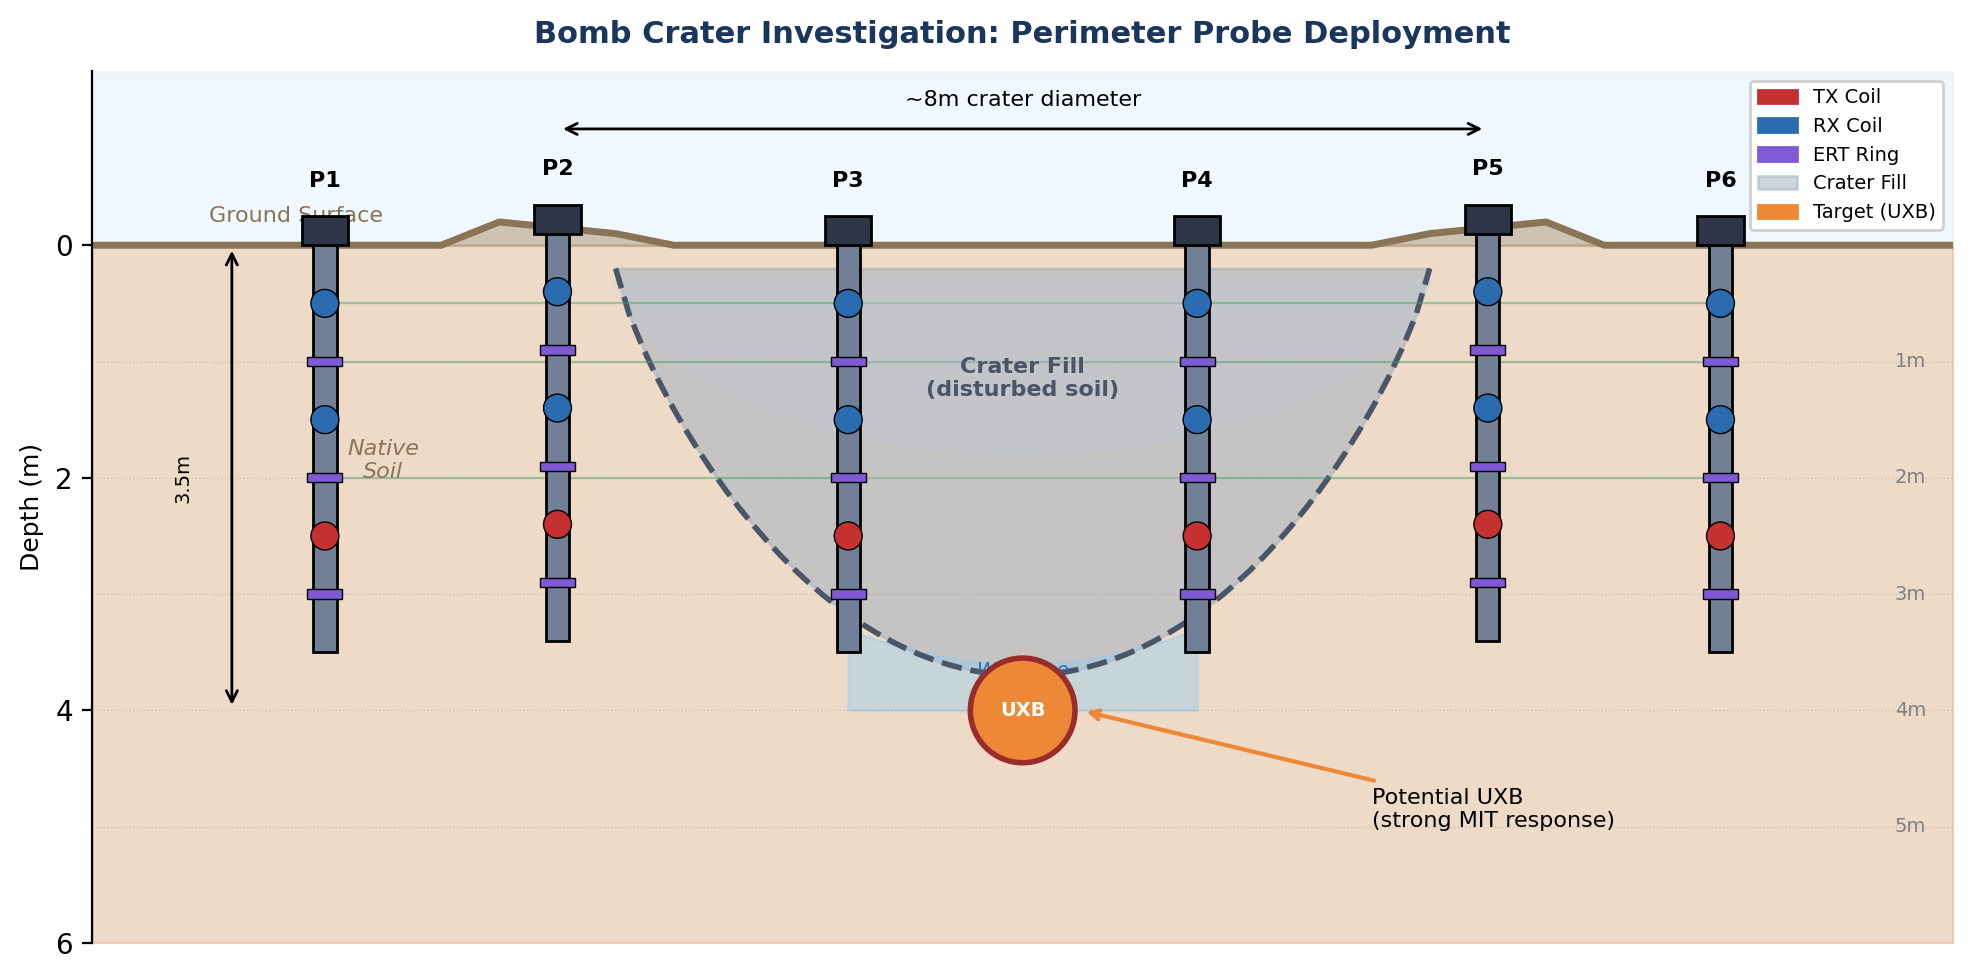

In [2]:
#| label: fig-bomb-crater
#| fig-cap: Bomb crater investigation configuration showing perimeter probe deployment around crater margin. Six 3.5m probes at 2m spacing provide comprehensive coverage through crater fill. MIT ray paths (green) interrogate the full volume including potential UXB location at crater base. ERT rings map fill boundaries and wet zones.
#| echo: false

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle, Circle
import numpy as np

# Color palette
COLORS = {
    'sky': '#e0f2fe',
    'ground_tan': '#d4a574',
    'ground_dark': '#8b7355',
    'gray_dark': '#4a5568',
    'probe_body': '#718096',
    'connector': '#2d3748',
    'ert_ring': '#805ad5',
    'tx_coil': '#c53030',
    'rx_coil': '#2b6cb0',
    'success': '#38a169',
    'warning': '#ed8936',
    'primary': '#1a365d',
}

fig, ax = plt.subplots(figsize=(10.67, 5))

ax.set_xlim(-8, 8)
ax.set_ylim(-5.5, 2)
ax.set_aspect('equal')

# Sky region
ax.fill_between([-8, 8], [0.5, 0.5], [2, 2], color=COLORS['sky'], alpha=0.5)

# Native soil background
ax.fill_between([-8, 8], [0.5, 0.5], [-5.5, -5.5], color=COLORS['ground_tan'], alpha=0.4)

# Crater rim uplift (ejecta)
rim_left_x = np.array([-5, -4.5, -3.5, -3])
rim_left_y = np.array([0.5, 0.7, 0.6, 0.5])
ax.fill_between(rim_left_x, rim_left_y, 0.5, color='#b8a082', alpha=0.6)

rim_right_x = np.array([3, 3.5, 4.5, 5])
rim_right_y = np.array([0.5, 0.6, 0.7, 0.5])
ax.fill_between(rim_right_x, rim_right_y, 0.5, color='#b8a082', alpha=0.6)

# Crater bowl shape (parabolic profile)
crater_x = np.linspace(-3.5, 3.5, 60)
crater_y = 0.3 - 3.5 * (1 - (crater_x/3.5)**2)**0.8

# Crater fill (disturbed soil - different layers)
ax.fill_between(crater_x, crater_y, 0.3, color='#a0aec0', alpha=0.5)
ax.plot(crater_x, crater_y, color=COLORS['gray_dark'], linewidth=2, linestyle='--',
        label='Crater boundary')

# Secondary fill layer (more recent)
crater_y2 = 0.2 - 1.5 * (1 - (crater_x/3.5)**2)**0.6
ax.fill_between(crater_x, crater_y2, 0.2, color='#c0c8d0', alpha=0.4)

# Water accumulation zone at bottom
water_x = np.linspace(-1.5, 1.5, 30)
water_y_top = -2.8 - 0.3 * (1 - (water_x/1.5)**2)
ax.fill_between(water_x, water_y_top, -3.5, color='#90cdf4', alpha=0.4)
ax.text(0, -3.2, 'Wet zone', fontsize=7, ha='center', color='#2b6cb0', style='italic')

# Ground surface line
surface_x = np.array([-8, -5, -4.5, -3.5, -3, 3, 3.5, 4.5, 5, 8])
surface_y = np.array([0.5, 0.5, 0.7, 0.6, 0.5, 0.5, 0.6, 0.7, 0.5, 0.5])
ax.plot(surface_x, surface_y, color=COLORS['ground_dark'], linewidth=2.5)
ax.text(-7, 0.7, 'Ground Surface', fontsize=8, color=COLORS['ground_dark'])

# Fill annotations
ax.text(0, -0.8, 'Crater Fill\n(disturbed soil)', fontsize=8, ha='center',
        color=COLORS['gray_dark'], fontweight='bold')
ax.text(-5.5, -1.5, 'Native\nSoil', fontsize=8, ha='center',
        color='#8b7355', style='italic')

# Probes around perimeter (3m length, 1.5-2m spacing)
probe_x = [-6, -4, -1.5, 1.5, 4, 6]
probe_length = 3.5

for i, px in enumerate(probe_x):
    # Calculate surface height at probe location
    if abs(px) <= 3:
        surface_h = 0.5
    elif abs(px) < 5:
        surface_h = 0.6
    else:
        surface_h = 0.5

    # Probe rod
    ax.add_patch(Rectangle((px-0.1, surface_h - probe_length), 0.2, probe_length,
                           color=COLORS['probe_body'], ec='black', lw=1, zorder=10))

    # Junction box
    ax.add_patch(Rectangle((px-0.2, surface_h), 0.4, 0.25,
                           color=COLORS['connector'], ec='black', lw=1, zorder=11))

    # ERT rings (at 0.5m, 1.5m, 2.5m from tip)
    for depth in [0.5, 1.5, 2.5]:
        y = surface_h - probe_length + depth
        ax.add_patch(Rectangle((px-0.15, y-0.04), 0.3, 0.08,
                               color=COLORS['ert_ring'], ec='black', lw=0.5, zorder=12))

    # TX/RX coils
    for depth, coil_type in [(1.0, 'tx'), (2.0, 'rx'), (3.0, 'rx')]:
        y = surface_h - probe_length + depth
        color = COLORS['tx_coil'] if coil_type == 'tx' else COLORS['rx_coil']
        ax.add_patch(Circle((px, y), 0.12, color=color, ec='black', lw=0.5, zorder=12))

    # Probe label
    ax.text(px, surface_h + 0.5, f'P{i+1}', ha='center', fontsize=8, fontweight='bold')

# Ray paths (showing measurement coverage)
ray_depths = [1.5, 2.5, 3.0]
for depth in ray_depths:
    for i, p1 in enumerate(probe_x[:-1]):
        for p2 in probe_x[i+1:]:
            if abs(p1 - p2) <= 5:  # Only nearby pairs
                y1 = 0.5 - probe_length + depth
                y2 = 0.5 - probe_length + depth
                ax.plot([p1, p2], [y1, y2], color=COLORS['success'], alpha=0.25, lw=0.8)

# Target UXB at depth
target = Circle((0, -3.5), 0.45, color=COLORS['warning'], ec='#9b2c2c', lw=2, zorder=20)
ax.add_patch(target)
ax.text(0, -3.5, 'UXB', fontsize=7, ha='center', va='center',
        color='white', fontweight='bold', zorder=21)

# Target annotation
ax.annotate('Potential UXB\n(strong MIT response)', (0.5, -3.5), (3, -4.5),
            fontsize=8, ha='left',
            arrowprops=dict(arrowstyle='->', color=COLORS['warning'], lw=1.5))

# Depth scale
for d in [1, 2, 3, 4, 5]:
    ax.axhline(0.5 - d, color='gray', linestyle=':', alpha=0.3, linewidth=0.5)
    ax.text(7.5, 0.5 - d, f'{d}m', fontsize=7, va='center', color='gray')

# Dimension annotations
ax.annotate('', xy=(-4, 1.5), xytext=(4, 1.5),
            arrowprops=dict(arrowstyle='<->', color='black', lw=1))
ax.text(0, 1.7, '~8m crater diameter', ha='center', fontsize=8)

ax.annotate('', xy=(-6.8, -3.5), xytext=(-6.8, 0.5),
            arrowprops=dict(arrowstyle='<->', color='black', lw=1))
ax.text(-7.3, -1.5, '3.5m', fontsize=7, va='center', rotation=90)

# Legend
legend_elements = [
    mpatches.Patch(color=COLORS['tx_coil'], label='TX Coil'),
    mpatches.Patch(color=COLORS['rx_coil'], label='RX Coil'),
    mpatches.Patch(color=COLORS['ert_ring'], label='ERT Ring'),
    mpatches.Patch(color='#a0aec0', alpha=0.5, label='Crater Fill'),
    mpatches.Patch(color=COLORS['warning'], label='Target (UXB)'),
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=7, framealpha=0.9)

ax.set_title('Bomb Crater Investigation: Perimeter Probe Deployment',
            fontsize=11, fontweight='bold', color=COLORS['primary'], pad=10)
ax.set_ylabel('Depth (m)', fontsize=9)
ax.set_yticks([0.5, -1.5, -3.5, -5.5])
ax.set_yticklabels(['0', '2', '4', '6'])
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.show()

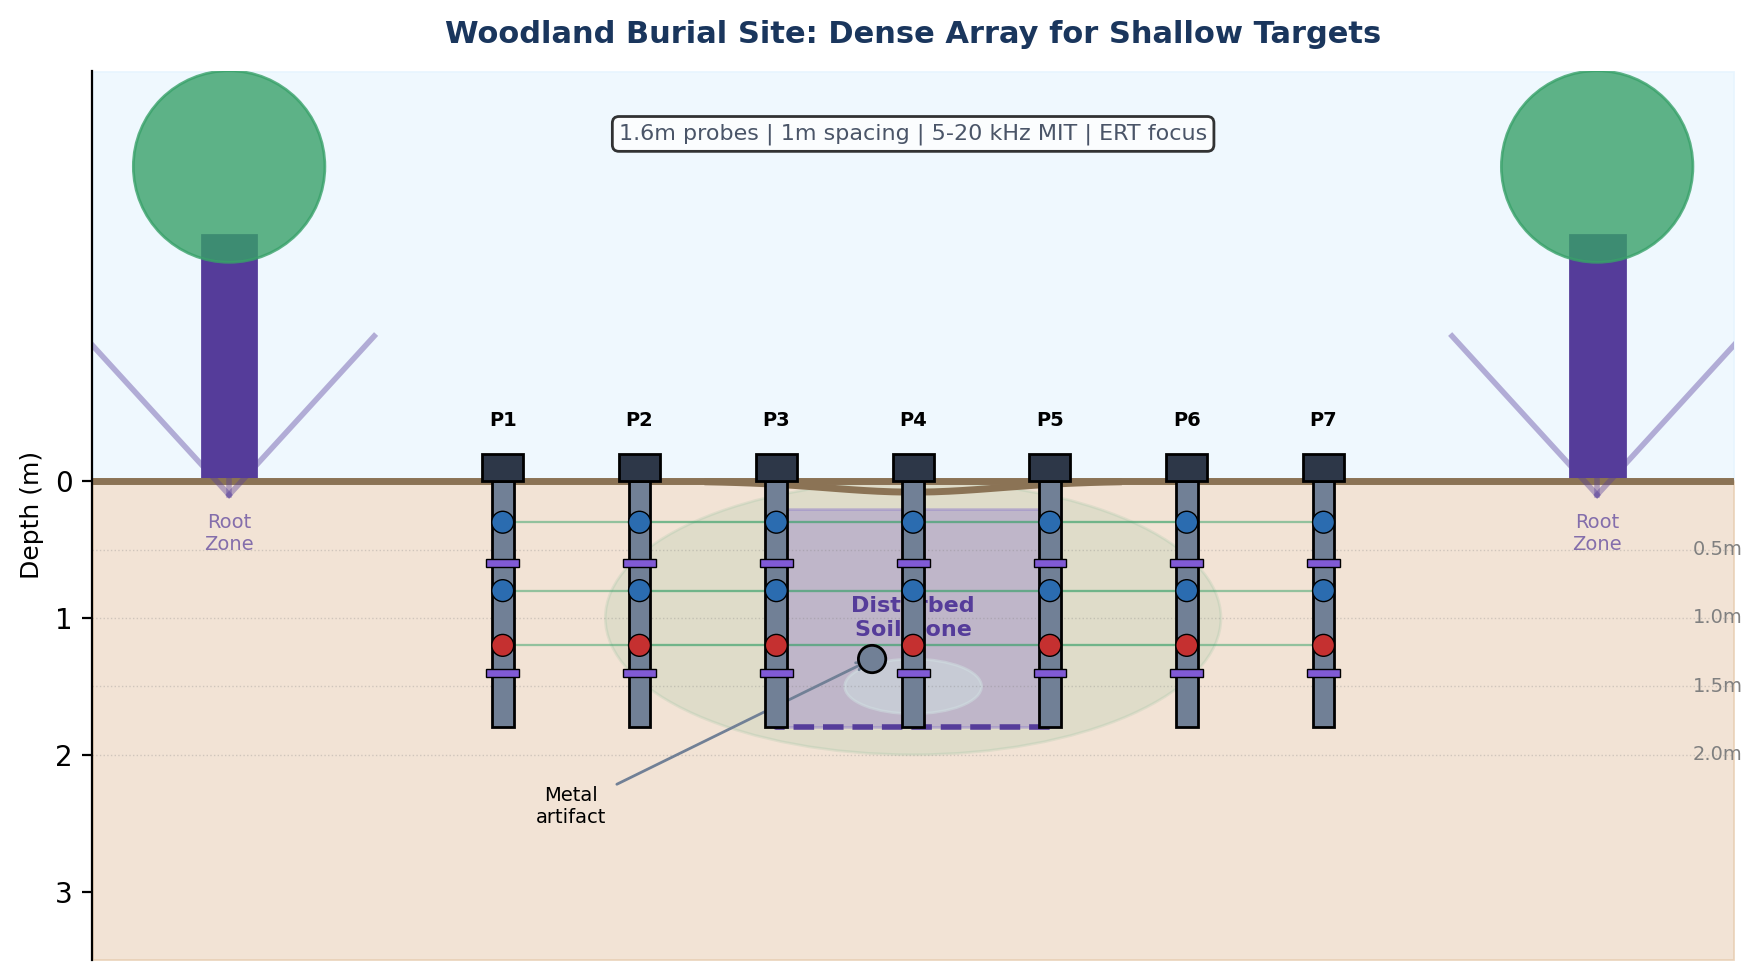

In [3]:
#| label: fig-woodland-burial
#| fig-cap: 'Woodland burial site configuration showing dense probe array (7 probes, 1m spacing) for shallow target detection. Disturbed soil zone (grave shaft) shows distinct ERT contrast. Tree root systems require careful probe positioning. MIT detects small metallic artifacts (buckles, buttons) within burial context.'
#| echo: false

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, Ellipse
import numpy as np

# Color palette
COLORS = {
    'sky': '#e0f2fe',
    'ground_tan': '#d4a574',
    'ground_dark': '#8b7355',
    'gray_dark': '#4a5568',
    'probe_body': '#718096',
    'connector': '#2d3748',
    'ert_ring': '#805ad5',
    'tx_coil': '#c53030',
    'rx_coil': '#2b6cb0',
    'success': '#38a169',
    'purple': '#805ad5',
    'primary': '#1a365d',
}

fig, ax = plt.subplots(figsize=(9.23, 5))

ax.set_xlim(-6, 6)
ax.set_ylim(-3.5, 3)
ax.set_aspect('equal')

# Sky
ax.fill_between([-6, 6], [0, 0], [3, 3], color=COLORS['sky'], alpha=0.5)

# Ground
ax.fill_between([-6, 6], [0, 0], [-3.5, -3.5], color=COLORS['ground_tan'], alpha=0.3)
ax.axhline(0, color=COLORS['ground_dark'], linewidth=2.5)

# Trees
for tx in [-5, 5]:
    # Trunk
    ax.add_patch(Rectangle((tx-0.2, 0), 0.4, 1.8, color='#553c9a'))
    # Crown
    ax.add_patch(Circle((tx, 2.3), 0.7, color=COLORS['success'], alpha=0.8))
    # Root system (simplified)
    for angle in [-45, 0, 45]:
        rad = np.radians(angle - 90)
        root_len = 1.5
        end_x = tx + root_len * np.cos(rad)
        end_y = -root_len * np.sin(rad)
        ax.plot([tx, end_x], [-0.1, end_y], color='#553c9a', alpha=0.4, lw=2)

# Burial shaft (disturbed soil zone)
shaft_left = -1.0
shaft_right = 1.0
shaft_bottom = -1.8

# Disturbed fill pattern
ax.fill_between([shaft_left, shaft_right], [shaft_bottom, shaft_bottom], [-0.2, -0.2],
               color=COLORS['purple'], alpha=0.3)
ax.plot([shaft_left, shaft_left, shaft_right, shaft_right],
        [-0.2, shaft_bottom, shaft_bottom, -0.2],
        color='#553c9a', linewidth=2, linestyle='--')

# Surface depression (subtle)
surface_x = np.linspace(-1.5, 1.5, 30)
surface_y = -0.08 * np.exp(-(surface_x**2)/0.8)
ax.plot(surface_x, surface_y, color=COLORS['ground_dark'], linewidth=2.5)

ax.text(0, -1.0, 'Disturbed\nSoil Zone', fontsize=8, ha='center', va='center',
        color='#553c9a', fontweight='bold')

# Potential remains indication (subtle)
ax.add_patch(Ellipse((0, -1.5), 1.0, 0.4, color='#e2e8f0', alpha=0.5))

# Probes (1.6m length, 1m spacing)
probe_x = [-3, -2, -1, 0, 1, 2, 3]
probe_length = 1.8

for i, px in enumerate(probe_x):
    # Probe rod
    ax.add_patch(Rectangle((px-0.08, -probe_length), 0.16, probe_length,
                           color=COLORS['probe_body'], ec='black', lw=1, zorder=10))

    # Junction box
    ax.add_patch(Rectangle((px-0.15, 0), 0.3, 0.2,
                           color=COLORS['connector'], ec='black', lw=1, zorder=11))

    # ERT rings (at 0.4m & 1.2m from tip)
    for depth in [0.4, 1.2]:
        y = -probe_length + depth
        ax.add_patch(Rectangle((px-0.12, y-0.03), 0.24, 0.06,
                               color=COLORS['ert_ring'], ec='black', lw=0.5, zorder=12))

    # TX/RX coils
    for depth, coil_type in [(0.6, 'tx'), (1.0, 'rx'), (1.5, 'rx')]:
        y = -probe_length + depth
        color = COLORS['tx_coil'] if coil_type == 'tx' else COLORS['rx_coil']
        ax.add_patch(Circle((px, y), 0.08, color=color, ec='black', lw=0.5, zorder=12))

    # Probe label
    ax.text(px, 0.4, f'P{i+1}', ha='center', fontsize=7, fontweight='bold')

# Dense ray paths through burial zone
for d1 in [0.6, 1.0, 1.5]:
    for i in range(len(probe_x)-1):
        for j in range(i+1, min(i+3, len(probe_x))):  # Short baselines
            y = -probe_length + d1
            ax.plot([probe_x[i], probe_x[j]], [y, y],
                   color=COLORS['success'], alpha=0.3, lw=0.8)

# Metallic artifact indication
artifact = Circle((-0.3, -1.3), 0.1, color='#718096', ec='black', lw=1, zorder=15)
ax.add_patch(artifact)
ax.annotate('Metal\nartifact', (-0.3, -1.3), (-2.5, -2.5),
            fontsize=7, ha='center',
            arrowprops=dict(arrowstyle='->', color='#718096', lw=1))

# ERT sensitivity zone
sensitivity = Ellipse((0, -1.0), 4.5, 2.0, color=COLORS['success'], alpha=0.1)
ax.add_patch(sensitivity)

# Depth markers
for d in [0.5, 1.0, 1.5, 2.0]:
    ax.axhline(-d, color='gray', linestyle=':', alpha=0.3, linewidth=0.5)
    ax.text(5.7, -d, f'{d}m', fontsize=7, va='center', color='gray')

# Annotations
ax.text(-5, -0.5, 'Root\nZone', fontsize=7, ha='center', color='#553c9a', alpha=0.7)
ax.text(5, -0.5, 'Root\nZone', fontsize=7, ha='center', color='#553c9a', alpha=0.7)

# Configuration note
ax.text(0, 2.5, '1.6m probes | 1m spacing | 5-20 kHz MIT | ERT focus',
        ha='center', fontsize=8, color=COLORS['gray_dark'],
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax.set_title('Woodland Burial Site: Dense Array for Shallow Targets',
            fontsize=11, fontweight='bold', color=COLORS['primary'], pad=10)
ax.set_ylabel('Depth (m)', fontsize=9)
ax.set_yticks([0, -1, -2, -3])
ax.set_yticklabels(['0', '1', '2', '3'])
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.show()

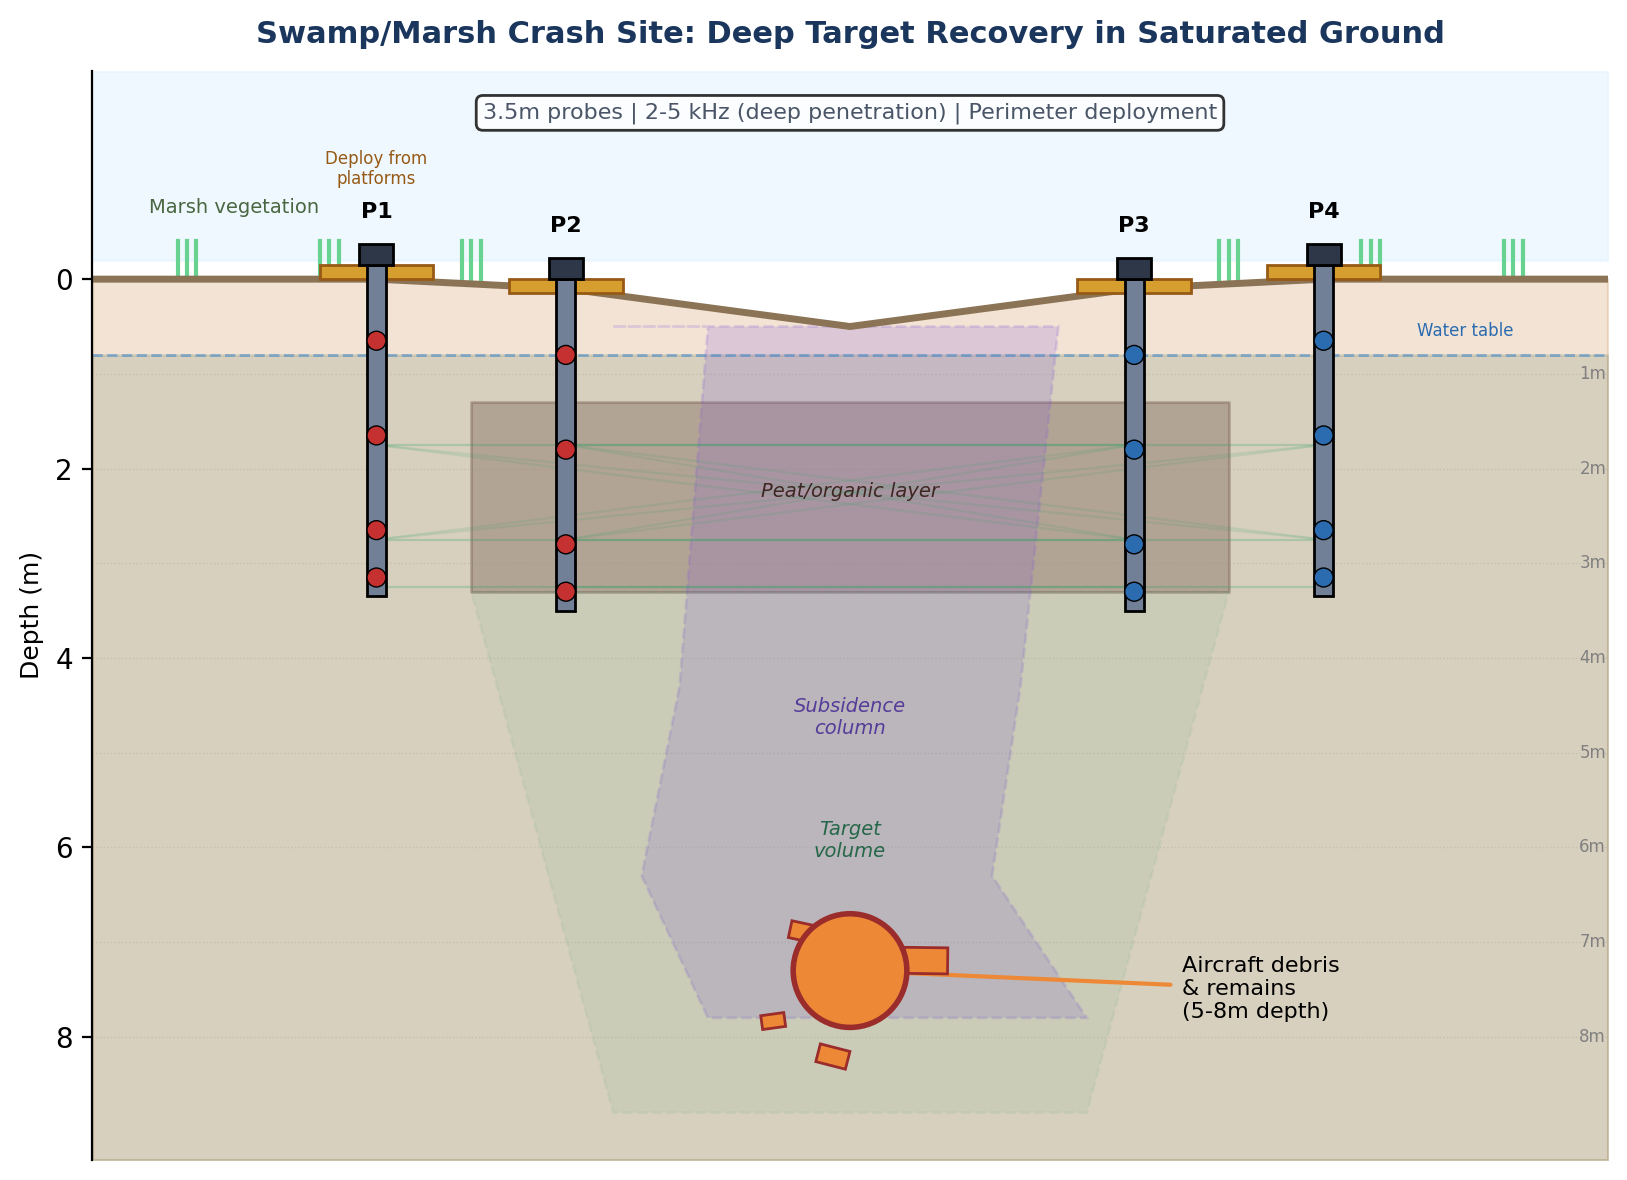

In [4]:
#| label: fig-swamp-margin
#| fig-cap: 'Swamp/marsh crash site configuration showing probe deployment around the impact zone. Soft, saturated soil caused the aircraft to sink progressively deeper over decades. Extended 3.5m probes with low-frequency MIT (2-5 kHz) are essential for detecting debris at 5-8+ meter depths. Deployment platforms may be required due to soft ground conditions.'
#| echo: false

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, Polygon, FancyBboxPatch
import numpy as np

# Color palette
COLORS = {
    'sky': '#e0f2fe',
    'ground_tan': '#d4a574',
    'ground_dark': '#8b7355',
    'gray_dark': '#4a5568',
    'probe_body': '#718096',
    'connector': '#2d3748',
    'tx_coil': '#c53030',
    'rx_coil': '#2b6cb0',
    'success': '#38a169',
    'warning': '#ed8936',
    'purple': '#805ad5',
    'accent': '#3182ce',
    'primary': '#1a365d',
    'marsh_green': '#68d391',
    'peat': '#5d4037',
    'saturated': '#4a6741',
}

fig, ax = plt.subplots(figsize=(9, 6))

ax.set_xlim(-8, 8)
ax.set_ylim(-9, 2.5)
ax.set_aspect('equal')

# Sky
ax.fill_between([-8, 8], [0.5, 0.5], [2.5, 2.5], color=COLORS['sky'], alpha=0.5)

# Surface layer - marshy ground with slight depression at crash site
surface_x = np.array([-8, -5, -3, -1.5, 0, 1.5, 3, 5, 8])
surface_y = np.array([0.3, 0.3, 0.2, 0.0, -0.2, 0.0, 0.2, 0.3, 0.3])
ax.fill_between(surface_x, surface_y, -9, color=COLORS['ground_tan'], alpha=0.3)

# Saturated zone (water table near surface)
ax.fill_between([-8, 8], [-0.5, -0.5], [-9, -9], color=COLORS['saturated'], alpha=0.15)

# Peat/organic layer
ax.fill_between([-4, 4], [-1, -1], [-3, -3], color=COLORS['peat'], alpha=0.3)
ax.text(0, -2, 'Peat/organic layer', fontsize=7, ha='center', color='#3e2723', style='italic')

# Disturbed column from crash - shows subsidence path
disturbed_x = [-2.5, -1.5, -1.8, -2.2, -1.5, 2.5, 1.5, 1.8, 2.2, 1.5]
disturbed_y = [-0.2, -0.2, -4, -6, -7.5, -7.5, -6, -4, -0.2, -0.2]
disturbed = Polygon(list(zip(disturbed_x[:5], disturbed_y[:5])) +
                   list(zip(disturbed_x[5:], disturbed_y[5:])),
                   closed=True, fill=True, facecolor=COLORS['purple'],
                   alpha=0.2, edgecolor=COLORS['purple'], linestyle='--', lw=1)
ax.add_patch(disturbed)
ax.text(0, -4.5, 'Subsidence\ncolumn', fontsize=7, ha='center', color='#553c9a', style='italic')

# Surface vegetation/marsh indicators
for x in [-7, -5.5, -4, 4, 5.5, 7]:
    y = 0.3 if abs(x) > 3 else 0.1
    # Marsh grass tufts
    for dx in [-0.1, 0, 0.1]:
        ax.plot([x+dx, x+dx], [y, y+0.4], color=COLORS['marsh_green'], lw=1.5)

# Water table line
ax.axhline(-0.5, color='#3182ce', linestyle='--', alpha=0.5, linewidth=1)
ax.text(7, -0.3, 'Water table', fontsize=6, color='#2b6cb0', ha='right')

# Surface line
ax.plot(surface_x, surface_y, color=COLORS['ground_dark'], linewidth=2.5)

# Deployment platforms (boards for soft ground)
for px in [-5, -3, 3, 5]:
    platform_y = 0.3 if abs(px) > 3.5 else 0.15
    ax.add_patch(Rectangle((px-0.6, platform_y), 1.2, 0.15,
                           color='#d69e2e', ec='#975a16', lw=1, zorder=8))

# Probes - perimeter deployment around crash zone
probe_positions = [(-5, 0.45), (-3, 0.3), (3, 0.3), (5, 0.45)]
probe_len = 3.5

for i, (px, surface_h) in enumerate(probe_positions):
    # Probe rod
    ax.add_patch(Rectangle((px-0.1, surface_h - probe_len), 0.2, probe_len,
                           color=COLORS['probe_body'], ec='black', lw=1, zorder=10))

    # Junction box
    ax.add_patch(Rectangle((px-0.18, surface_h), 0.36, 0.22,
                           color=COLORS['connector'], ec='black', lw=1, zorder=11))

    # Sensors at multiple depths
    coil_color = COLORS['tx_coil'] if i < 2 else COLORS['rx_coil']
    for depth in [0.8, 1.8, 2.8, 3.3]:
        y = surface_h - depth
        ax.add_patch(Circle((px, y), 0.1, color=coil_color, ec='black', lw=0.5, zorder=12))

    ax.text(px, surface_h + 0.5, f'P{i+1}', ha='center', fontsize=8, fontweight='bold')

# MIT ray paths through target volume
for i, (px1, _) in enumerate(probe_positions[:2]):
    for j, (px2, _) in enumerate(probe_positions[2:]):
        for d1, d2 in [(1.8, 1.8), (2.8, 2.8), (1.8, 2.8), (2.8, 1.8), (3.3, 3.3)]:
            y1 = 0.35 - d1
            y2 = 0.35 - d2
            ax.plot([px1, px2], [y1, y2], color=COLORS['success'], alpha=0.15, lw=0.8)

# Deep debris field
debris_depths = [(-0.5, -6.5), (0.3, -7.2), (-0.2, -7.8), (0.8, -6.8), (-0.8, -7.5)]
for dx, dy in debris_depths:
    size = 0.2 + np.random.rand() * 0.3
    ax.add_patch(Rectangle((dx-size/2, dy-size/2), size, size*0.6,
                           color=COLORS['warning'], ec='#9b2c2c', lw=1,
                           angle=np.random.rand()*30-15, zorder=20))

# Main wreckage mass
ax.add_patch(Circle((0, -7), 0.6, color=COLORS['warning'], ec='#9b2c2c', lw=2, zorder=20))
ax.annotate('Aircraft debris\n& remains\n(5-8m depth)', (0, -7), (3.5, -7.5),
            fontsize=8, ha='left',
            arrowprops=dict(arrowstyle='->', color=COLORS['warning'], lw=1.5))

# Coverage zone indication
coverage = Polygon([(-4, -3), (4, -3), (2.5, -8.5), (-2.5, -8.5)],
                   closed=True, fill=True, facecolor=COLORS['success'],
                   alpha=0.08, edgecolor=COLORS['success'], linestyle='--', lw=1)
ax.add_patch(coverage)
ax.text(0, -5.8, 'Target\nvolume', fontsize=7, ha='center', color='#276749', style='italic')

# Depth markers
for d in [1, 2, 3, 4, 5, 6, 7, 8]:
    ax.axhline(0.3 - d, color='gray', linestyle=':', alpha=0.2, linewidth=0.5)
    ax.text(7.7, 0.3 - d, f'{d}m', fontsize=6, va='center', color='gray')

# Surface indication
ax.text(-6.5, 1.0, 'Marsh vegetation', fontsize=7, ha='center', color=COLORS['saturated'])

# Configuration note
ax.text(0, 2.0, '3.5m probes | 2-5 kHz (deep penetration) | Perimeter deployment',
        ha='center', fontsize=8, color=COLORS['gray_dark'],
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Note about platforms
ax.text(-5, 1.3, 'Deploy from\nplatforms', fontsize=6, ha='center', color='#975a16')

ax.set_title('Swamp/Marsh Crash Site: Deep Target Recovery in Saturated Ground',
            fontsize=11, fontweight='bold', color=COLORS['primary'], pad=10)
ax.set_ylabel('Depth (m)', fontsize=9)
ax.set_yticks([0.3, -1.7, -3.7, -5.7, -7.7])
ax.set_yticklabels(['0', '2', '4', '6', '8'])
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.show()